# Models Tuning

Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
%cd ..

/home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


In [4]:
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

from source.custom_classes.data_loaders import ACSEmploymentDataset
from source.utils.model_tuning_utils import test_baseline_models

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [5]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [ ]:
DATASET_CONFIG = {
    'state': "GA",
    'year': 2018,
}

In [6]:
STATE = DATASET_CONFIG['state']
YEAR = DATASET_CONFIG['year']
DATASET_NAME = f"Folktables_{STATE}_{YEAR}"

## Loading ACSEmployment data

In [7]:
dataset = ACSEmploymentDataset(state=[STATE], year=YEAR, root_dir='data', with_nulls=False)

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (80684, 16)
Baseline X_test shape:  (20171, 16)
X_train_features.columns:  Index(['RAC1P_6', 'SCHL_24', 'ESP_7', 'SCHL_15', 'MAR_5', 'SCHL_11',
       'NATIVITY_2', 'ESP_0', 'ANC_3', 'SEX_2', 'RAC1P_9', 'SCHL_16', 'DEAR_1',
       'ANC_2', 'ESP_2', 'RELP_16', 'RELP_10', 'MAR_3', 'SCHL_4', 'ESP_6',
       'MIG_3', 'SCHL_1', 'RELP_17', 'MAR_4', 'RELP_2', 'ESP_4', 'MIG_1',
       'RAC1P_8', 'RELP_15', 'MIL_3', 'SEX_1', 'MIL_0', 'SCHL_20', 'MAR_2',
       'RAC1P_2', 'CIT_1', 'DEAR_2', 'DREM_2', 'ESP_5', 'SCHL_2', 'MIL_2',
       'SCHL_0', 'MIG_0', 'SCHL_10', 'RELP_3', 'NATIVITY_1', 'ANC_1', 'RELP_7',
       'DIS_2', 'ESP_3', 'CIT_4', 'RELP_8', 'SCHL_14', 'RELP_5', 'RELP_1',
       'SCHL_12', 'DREM_0', 'SCHL_13', 'RELP_12', 'DIS_1', 'SCHL_17', 'MIG_2',
       'RELP_6', 'RAC1P_5', 'RELP_11', 'RELP_0', 'SCHL_8', 'SCHL_22', 'MIL_4',
       'SCHL_6', 'SCHL_7', 'RELP_9', 'RELP_13', 'SCHL_21', 'DREM_1', 'CIT_5',
       'SCHL_18', 'DEYE_1', 'RAC1P_3', 'SCHL_19', 'AGEP', 'C

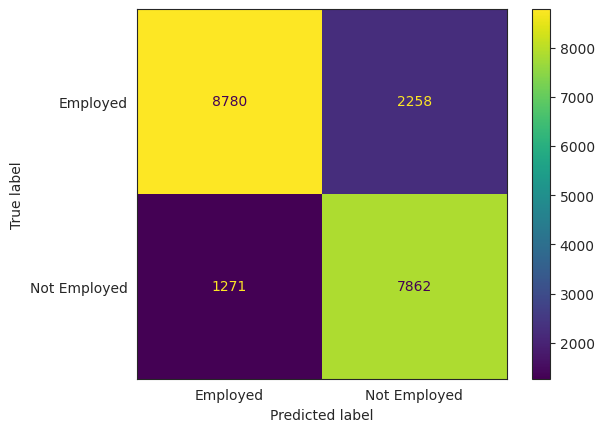

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,Folktables_GA_2018,SVC,0.824683,0.825046,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}"


In [8]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [9]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,Folktables_GA_2018,SVC,0.824683,0.825046,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."


In [10]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: SVC
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [11]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", columns=ML_baseline_results_df.columns, float_format="%.4f")